# Business Objective

#### We have reseach paper in pdf format, have to do sentiment analysis and make a model.

# Import Dependencies

In [1]:
import nltk
from nltk.chat.util import Chat, reflections

# Import Python basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Libraries for reading PDFs
import PyPDF2 
import os, sys


# Import NLTK Text Processing Libraries
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import punkt
from nltk.cluster.util import cosine_distance

import networkx as nx

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
pwd

'C:\\Users\\avina\\OneDrive\\Desktop\\Projects'

# Load Data

In [3]:
directory = 'C:\\Users\\avina\\OneDrive\\Desktop\\Projects'

In [4]:
allwords = []
allcount = 0
alltext = ""
i = 0
for file in os.listdir(directory):
    i += 1
    if not file.endswith(".pdf"):
        continue
    pdf_filename =  os.path.join(directory,file)  
       
    #open file
    pdfFileObj = open(pdf_filename,'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    num_pages = pdfReader.numPages
    #Read content of PDF as Text
    count = 0
    text = ""
    while count < num_pages:
        pageObj = pdfReader.getPage(count)
        count +=1
        text += pageObj.extractText()
    if text != "":
       text = text
    alltext = alltext + text
    # Extracting word Tokens from Text
    allcount = allcount + count
    tokens = word_tokenize(text)
    tokens = [w.lower() for w in tokens]
   #Lemmatization 
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
     #Remove Stopwords and Punctuations
    punctuation = ['(',')',';',':','[',']',',']
    stop_words = stopwords.words('english')
    
    keywords = [word for word in tokens if not word in stop_words and  not word in punctuation and word.isalpha()]
    #print(keywords)
    allwords += keywords


In [5]:
keywords

['four',
 'step',
 'forgiveness',
 'powerful',
 'way',
 'happiness',
 'freedom',
 'success',
 'william',
 'fergus',
 'martin',
 'book',
 'book',
 'four',
 'step',
 'forgiveness',
 'offered',
 'free',
 'charge',
 'behalf',
 'global',
 'forgiveness',
 'initiative',
 'registered',
 'uk',
 'charity',
 'number',
 'available',
 'free',
 'download',
 'language',
 'via',
 'popular',
 'website',
 'get',
 'million',
 'visitor',
 'year',
 'book',
 'based',
 'book',
 'forgiveness',
 'power',
 'also',
 'written',
 'william',
 'fergus',
 'martin',
 'published',
 'inner',
 'tradition',
 'isbn',
 'forgiveness',
 'power',
 'also',
 'available',
 'international',
 'edition',
 'indian',
 'edition',
 'isbn',
 'traditional',
 'chinese',
 'isbn',
 'simplified',
 'chinese',
 'isbn',
 'information',
 'author',
 'http',
 'four',
 'step',
 'forgiveness',
 'copyright',
 'william',
 'fergus',
 'martin',
 'right',
 'reserved',
 'book',
 'portion',
 'thereof',
 'may',
 'reproduced',
 'used',
 'manner',
 'whatsoever

## Wordcloud 

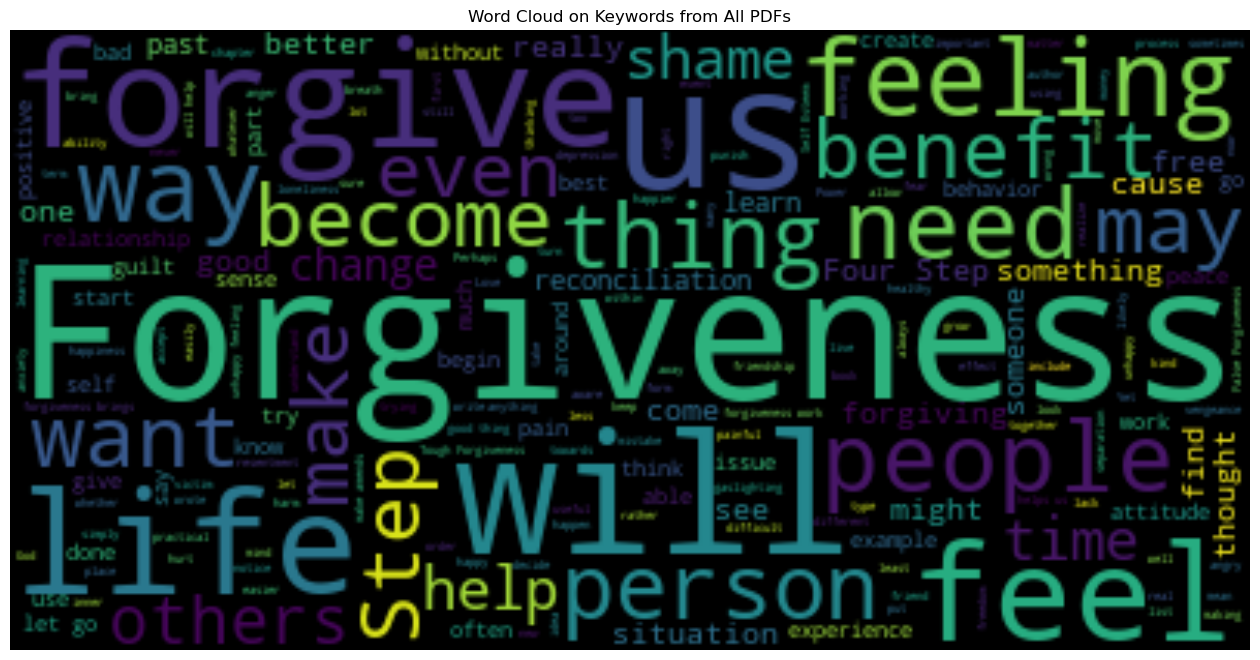

In [6]:
df = pd.DataFrame(allwords)
#ebook_text = pd.DataFrame(allwords)

wordstr = ' '.join(str(e) for e in allwords)
# ## 1. WordCloud

# Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

from wordcloud import WordCloud, STOPWORDS 

wordcloud = WordCloud(max_font_size=60).generate(alltext)

plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud on Keywords from All PDFs")
plt.show()

### TF-IDF - For Feature Extraction

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
text_data = np.array(allwords)

feature_matrix = tfidf.fit_transform(text_data)
feature_matrix.toarray()

# Show tf-idf feature matrix
tfidf.get_feature_names_out()

array(['abandoned', 'ability', 'able', ..., 'yet', 'yoga', 'young'],
      dtype=object)

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [WinError 10061] No
[nltk_data]     connection could be made because the target machine
[nltk_data]     actively refused it>


False

### Fequency Distribution Plot For Allwords

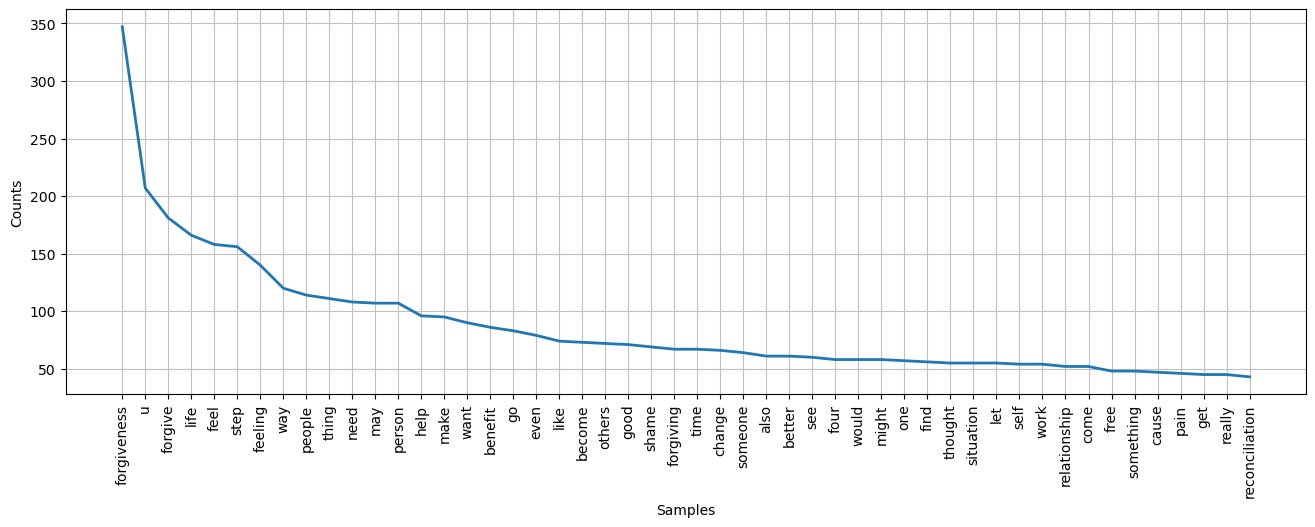

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
import nltk
from nltk.probability import FreqDist

fqdist = FreqDist(allwords)

freqdist = nltk.FreqDist(allwords)
plt.figure(figsize=(16,5))
freqdist.plot(50)

### Most Frequent 20 words in all text

In [10]:
freqdist.most_common(20)

[('forgiveness', 347),
 ('u', 207),
 ('forgive', 181),
 ('life', 166),
 ('feel', 158),
 ('step', 156),
 ('feeling', 140),
 ('way', 120),
 ('people', 114),
 ('thing', 111),
 ('need', 108),
 ('may', 107),
 ('person', 107),
 ('help', 96),
 ('make', 95),
 ('want', 90),
 ('benefit', 86),
 ('go', 83),
 ('even', 79),
 ('like', 74)]

### Bar Chart For Most Common 20 Words

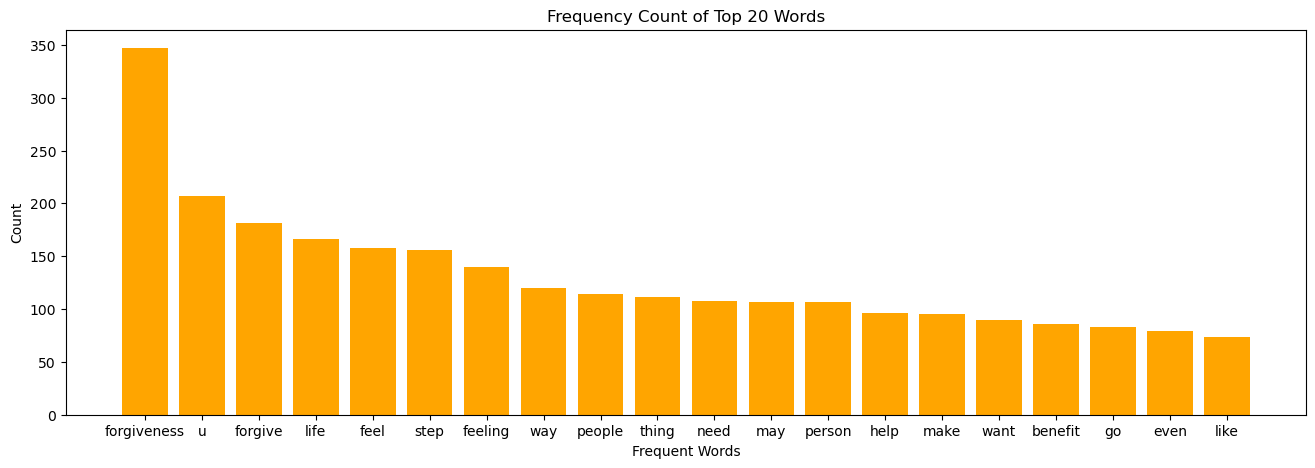

<Figure size 640x480 with 0 Axes>

In [11]:
x, y = zip(*freqdist.most_common(n=20))
plt.figure(figsize=(16,5))
plt.bar(range(len(x)), y, color = 'Orange', tick_label = y)
plt.xticks(range(len(x)), x)
plt.title('Frequency Count of Top 20 Words')
plt.xlabel('Frequent Words')
plt.ylabel('Count')
plt.show()
plt.savefig('Most Frequent 10 words.jpeg')

### Least 5 Common Words

In [12]:
freqdist.most_common()[-5:]

[('endorphin', 1), ('sister', 1), ('jon', 1), ('mundy', 1), ('miracle', 1)]

### Bigram - Two words comes together

In [13]:
bigrams = nltk.bigrams(allwords)
# Calculate Frequency Distribution for Bigrams
freq_bi = nltk.FreqDist(bigrams)

### Bar Graph For Most 20 Common Bigram

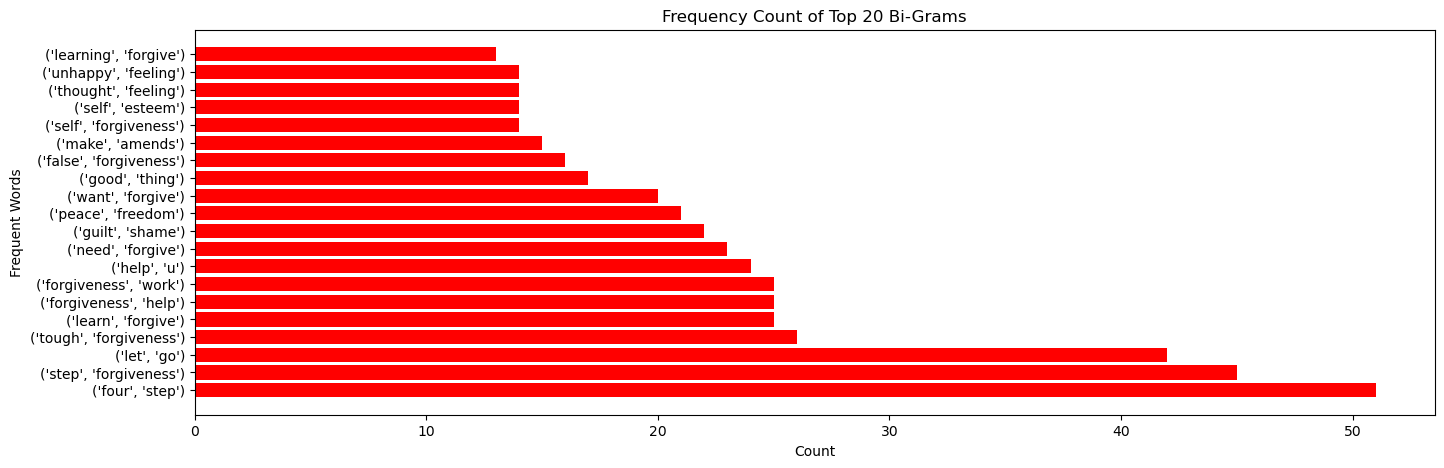

<Figure size 640x480 with 0 Axes>

In [14]:
x,y = zip(*freq_bi.most_common(n=20))
plt.figure(figsize=(16,5))
plt.barh(range(len(x)), y, color = 'Red')
#plt.barh(x,range(len(x)), color = 'Orange', tick_label = y)
#plt.xticks(range(len(x)), x)
y_pos = np.arange(len(x))
plt.yticks(y_pos, x)
plt.title('Frequency Count of Top 20 Bi-Grams')
plt.ylabel('Frequent Words')
plt.xlabel('Count')
plt.show()
plt.savefig('Most Frequent 20 Bi-Grams.jpeg')

### Trigrams - Three words comes together

In [15]:
trigrams = nltk.trigrams(allwords)
# Calculate Frequency Distribution for Trigrams
freq_tri = nltk.FreqDist(trigrams)

# Print and plot most common Trigrams
freq_tri.most_common(20)

[(('four', 'step', 'forgiveness'), 42),
 (('love', 'peace', 'freedom'), 8),
 (('make', 'u', 'feel'), 8),
 (('peace', 'freedom', 'minute'), 7),
 (('accept', 'peace', 'freedom'), 7),
 (('peace', 'freedom', 'forgiveness'), 7),
 (('let', 'go', 'past'), 7),
 (('william', 'fergus', 'martin'), 6),
 (('self', 'esteem', 'self'), 6),
 (('esteem', 'self', 'confidence'), 6),
 (('forgiveness', 'help', 'u'), 6),
 (('using', 'four', 'step'), 6),
 (('self', 'worth', 'self'), 5),
 (('worth', 'self', 'esteem'), 5),
 (('freedom', 'minute', 'forgiveness'), 5),
 (('forgiveness', 'set', 'free'), 5),
 (('good', 'thing', 'life'), 5),
 (('keep', 'going', 'round'), 5),
 (('would', 'write', 'forgive'), 5),
 (('way', 'make', 'amends'), 5)]

### Bar Chart For 20 Most Common Trigrams

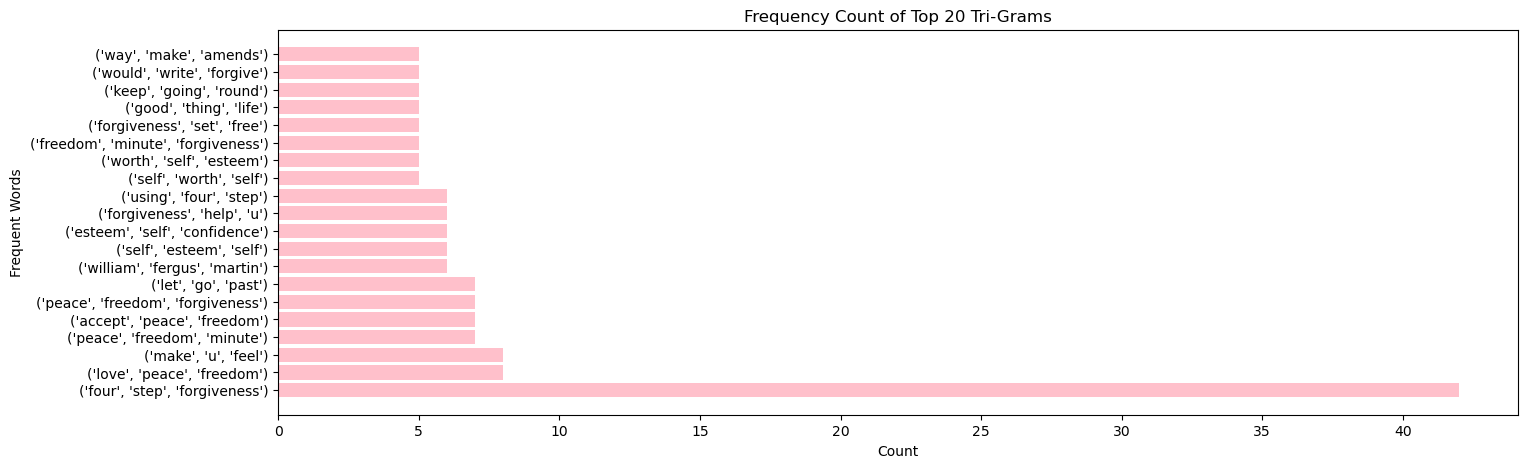

<Figure size 640x480 with 0 Axes>

In [16]:
x,y = zip(*freq_tri.most_common(n=20))
plt.figure(figsize=(16,5))
plt.barh(range(len(x)), y, color = 'Pink')
#plt.barh(x,range(len(x)), color = 'Orange', tick_label = y)
#plt.xticks(range(len(x)), x)
y_pos = np.arange(len(x))
plt.yticks(y_pos, x)
plt.title('Frequency Count of Top 20 Tri-Grams')
plt.ylabel('Frequent Words')
plt.xlabel('Count')
plt.show()
plt.savefig('Most Frequent 20 Tri-Grams.jpeg')

### Word Length Distribution Plot 

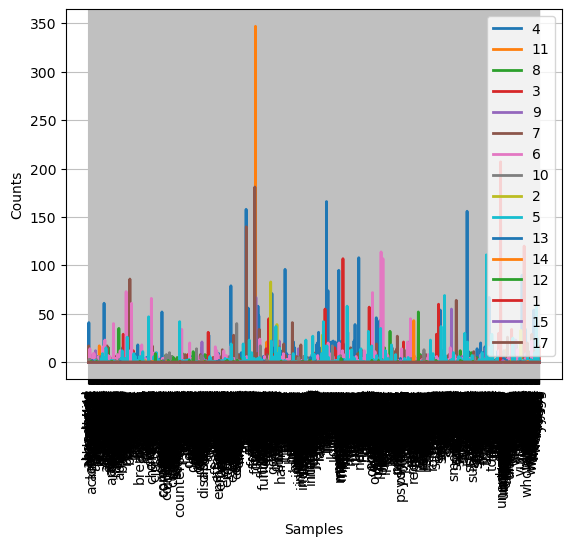

<Axes: xlabel='Samples', ylabel='Counts'>

In [17]:
#### This plot is word length on x-axis vs number of words of that length on the y-axis. This plot helps to visualise the composition of different word length in the text corpus.

from nltk.probability import ConditionalFreqDist

cfdist = ConditionalFreqDist((len(word), word) for word in allwords )
cfdist.plot()

### T-SNE Plot

C:\Users\avina\anaconda3\Lib\site-packages\yellowbrick\text\tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


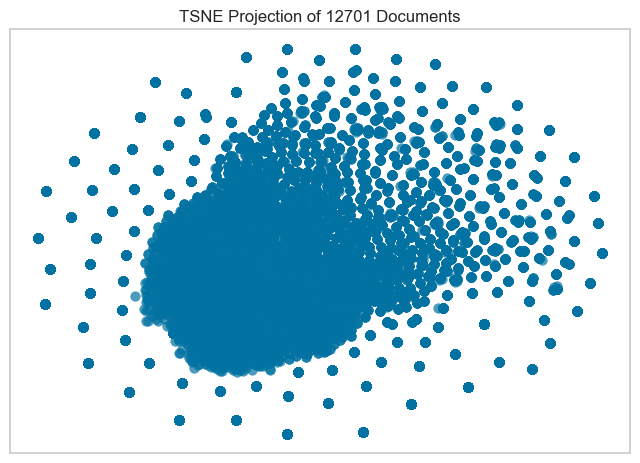

C:\Users\avina\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [18]:
#  Visualizing document similarity is to use t-distributed stochastic neighbor embedding

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()

docs   = tfidf.fit_transform(allwords)

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(docs)
tsne.poof()

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

text_counts= cv.fit_transform(df[0])

In [19]:
df2 = df

In [20]:
df2.columns = ["Text"]

In [21]:
df2

,Text
0,four
1,step
2,forgiveness
3,powerful
4,way
...,...
12696,use
12697,brief
12698,quotation
12699,book


### Generating Subjectivity and Polarity of extracted Text

In [22]:
from textblob import TextBlob as TB
# calculate subjectivity and Polarity to understand emotions in tweets
# function for subjectivity
def calc_subject(Text):
    return TB(Text).sentiment.subjectivity
 
# function for Polarity
def calc_polarity(Text):
    return TB(Text).sentiment.polarity
 
df2['Subjectivity'] = df2.Text.apply(calc_subject)
df2['Polarity'] = df2.Text.apply(calc_polarity)

In [23]:
df2.head(15)# checking on dataset

,Text,Subjectivity,Polarity
0,four,0.0,0.0
1,step,0.0,0.0
2,forgiveness,0.0,0.0
3,powerful,1.0,0.3
4,way,0.0,0.0
5,happiness,0.2,0.7
6,freedom,0.0,0.0
7,success,0.0,0.3
8,william,0.0,0.0
9,fergus,0.0,0.0


### Generating Sentiment analysis

In [24]:
def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
 
df2['Analysis'] = df2.Polarity.apply(sentiment)

In [25]:
df2.head(20)

,Text,Subjectivity,Polarity,Analysis
0,four,0.0,0.0,Netural
1,step,0.0,0.0,Netural
2,forgiveness,0.0,0.0,Netural
3,powerful,1.0,0.3,Positive
4,way,0.0,0.0,Netural
5,happiness,0.2,0.7,Positive
6,freedom,0.0,0.0,Netural
7,success,0.0,0.3,Positive
8,william,0.0,0.0,Netural
9,fergus,0.0,0.0,Netural


### Bar graph for Sentiment analysis

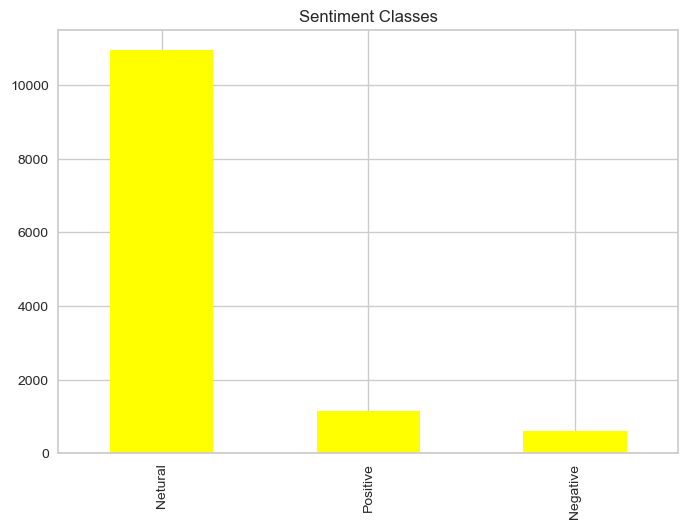

In [26]:
df2.Analysis.value_counts().plot(kind='bar', color='yellow')
plt.title('Sentiment Classes')
plt.show()

### Scatter Plot

Text(0, 0.5, 'Subjectivity')

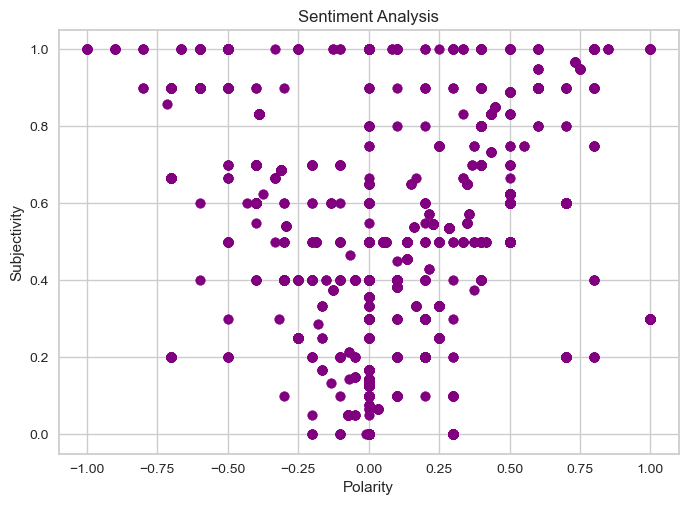

In [27]:
plt.scatter(df2.Polarity, df2.Subjectivity, color='purple')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

### Generatig Percentage of Sentiment

In [28]:
# Create
File_sentiment = pd.DataFrame(df2.Analysis.value_counts(normalize=True)*100)
 
# calculating total count of sentiment
File_sentiment['Total'] = df2.Analysis.value_counts()

In [29]:
File_sentiment

,Analysis,Total
Netural,86.245178,10954
Positive,8.983545,1141
Negative,4.771278,606


### Wordcloud for all Text for new Dataframe

[nltk_data] Error loading stopwords: <urlopen error [WinError 10061]
[nltk_data]     No connection could be made because the target machine
[nltk_data]     actively refused it>


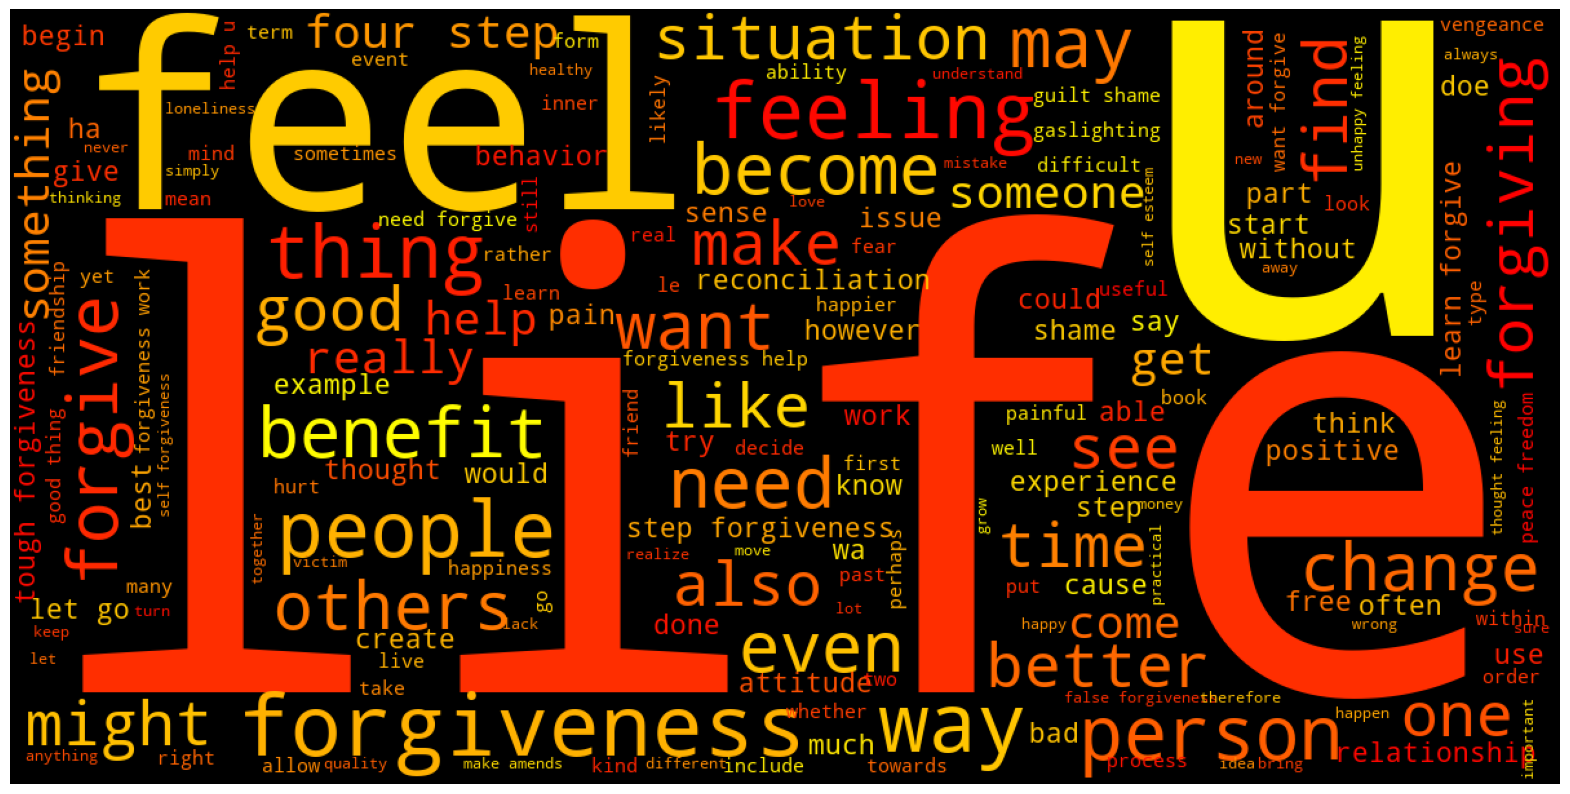

In [30]:
from wordcloud import WordCloud as WC
# loading stop words 
nltk.download('stopwords')
st_wd = set(nltk.corpus.stopwords.words('english'))
 
# Combining all texts
every_word = ' '.join([txts for txts in df2['Text']])
 
# word cloud function
def Word_cloud(data, mask=None):
    Cloud = WC(scale=3,
                      random_state=21,
                      colormap='autumn',
                      mask=mask,
                      stopwords=st_wd,
                      collocations=True,).generate(data)
    plt.figure(figsize=(20,12))
    plt.imshow(Cloud)
    plt.axis('off')
    plt.show()
    
# plotting the word cloud
Word_cloud(every_word)

### Splitting Data into Training and Testing Set

In [31]:
df2_analysis = df2[(df2.Analysis == 'Positive') | (df2.Analysis =='Negative') | (df2.Analysis == 'Neutral') ]

In [32]:
X = df2_analysis['Text']
y = df2_analysis['Analysis']

In [33]:
X.shape

(1747,)

In [34]:
y.shape

(1747,)

### Using CountVectorizer to convert Text to Vector form

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

# Model Building
## Multinomial Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [38]:
predictions = nb.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[171  26]
 [  0 328]]


              precision    recall  f1-score   support

    Negative       1.00      0.87      0.93       197
    Positive       0.93      1.00      0.96       328

    accuracy                           0.95       525
   macro avg       0.96      0.93      0.95       525
weighted avg       0.95      0.95      0.95       525



## Pipeline Method

In [40]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [41]:
X = df2_analysis['Text']
y = df2_analysis['Analysis']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [42]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [43]:
predictions1 = pipeline.predict(X_test)

print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

[[171  26]
 [  0 328]]
              precision    recall  f1-score   support

    Negative       1.00      0.87      0.93       197
    Positive       0.93      1.00      0.96       328

    accuracy                           0.95       525
   macro avg       0.96      0.93      0.95       525
weighted avg       0.95      0.95      0.95       525



# Conclusion
### From above analysis , it is clear that Multinomial Naive Bayes perform good with accuracy of 95%.